**import required libraries**

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


np.random.seed(2)

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

**  Load the data**

In [277]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [278]:
Y_train = train["label"]

X_train = train.drop(labels = ["label"],axis = 1) 

del train 

**Normalization**
* We convert data from [0,255] to [0,1] to make convergence faster

In [279]:
X_train = X_train / 255.0
test = test / 255.0

**Reshape**
* Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)

In [280]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

**Encode**
* Encode labels to one hot vectors

In [281]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [282]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1)

**CNN**
* Set the CNN model 

In [283]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 7, 64)          0         
__________

** Compile the model**

In [284]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [285]:
history=model.fit(X_train, Y_train,
                  batch_size = 64, epochs = 60, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/60
 - 7s - loss: 0.2370 - acc: 0.9246 - val_loss: 0.0630 - val_acc: 0.9786
Epoch 2/60
 - 4s - loss: 0.0774 - acc: 0.9758 - val_loss: 0.0428 - val_acc: 0.9871
Epoch 3/60
 - 4s - loss: 0.0604 - acc: 0.9817 - val_loss: 0.0377 - val_acc: 0.9864
Epoch 4/60
 - 4s - loss: 0.0475 - acc: 0.9850 - val_loss: 0.0320 - val_acc: 0.9912
Epoch 5/60
 - 4s - loss: 0.0442 - acc: 0.9873 - val_loss: 0.0315 - val_acc: 0.9907
Epoch 6/60
 - 4s - loss: 0.0353 - acc: 0.9892 - val_loss: 0.0309 - val_acc: 0.9905
Epoch 7/60
 - 4s - loss: 0.0315 - acc: 0.9901 - val_loss: 0.0367 - val_acc: 0.9900
Epoch 8/60
 - 4s - loss: 0.0291 - acc: 0.9912 - val_loss: 0.0390 - val_acc: 0.9926
Epoch 9/60
 - 4s - loss: 0.0262 - acc: 0.9920 - val_loss: 0.0290 - val_acc: 0.9929
Epoch 10/60
 - 4s - loss: 0.0255 - acc: 0.9925 - val_loss: 0.0356 - val_acc: 0.9914
Epoch 11/60
 - 4s - loss: 0.0249 - acc: 0.9926 - val_loss: 0.0283 - val_acc: 0.9929
Epoch 12/60
 - 4s - loss: 0.0223 - a

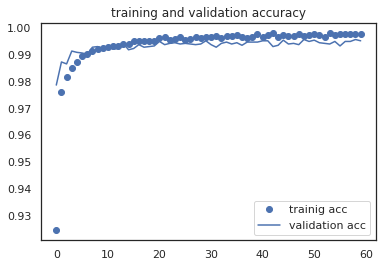

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs , acc , 'bo', label='trainig acc')
plt.plot(epochs , val_acc , 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs , loss , 'bo', label='trainig loss')
plt.plot(epochs , val_loss , 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()